# Chapter 8: Integration

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://link.springer.com/book/10.1007/979-8-8688-0413-7) (ISBN 979-8-8688-0412-0).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [2]:
import numpy as np

In [3]:
from scipy import integrate

In [4]:
import sympy
import mpmath

In [5]:
sympy.init_printing()

# Simpson's rule

In [6]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [7]:
#x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a+b)/2, b # simpson's rule
#x = a, b # trapezoid rule
#x = ((b+a)/2,)  # mid-point rule

In [8]:
w = [sympy.symbols("w_%d" % i) for i in range(len(x))] 

In [9]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])

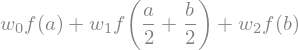

In [10]:
q_rule

In [11]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]

In [12]:
phi

In [13]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

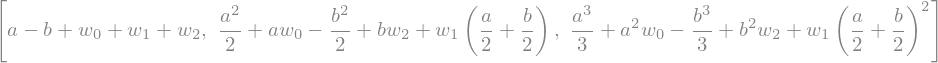

In [14]:
eqs

In [15]:
w_sol = sympy.solve(eqs, w)

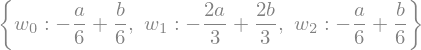

In [16]:
w_sol

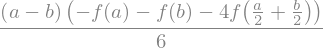

In [17]:
q_rule.subs(w_sol).simplify()

## SciPy `integrate`

### Simple integration example

In [18]:
def f(x):
    return np.exp(-x**2)

In [19]:
val, err = integrate.quad(f, -1, 1)

In [20]:
val

In [21]:
err

In [22]:
val, err = integrate.quadrature(f, -1, 1)

In [23]:
val

In [24]:
err

### Extra arguments

In [25]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

In [26]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

In [27]:
val

In [28]:
err

### Reshuffle arguments

In [29]:
from scipy.special import jv

In [30]:
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)

In [31]:
val

In [32]:
err

### Infinite limits 

In [33]:
f = lambda x: np.exp(-x**2)

In [34]:
val, err = integrate.quad(f, -np.inf, np.inf)

In [35]:
val

In [36]:
err

### Singularity

In [37]:
f = lambda x: 1/np.sqrt(abs(x))

In [38]:
a, b = -1, 1

In [39]:
integrate.quad(f, a, b)

/var/folders/dw/s8n_0fz93_517nztg9jpvkb80000gn/T/ipykernel_24799/525825373.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/np.sqrt(abs(x))
/var/folders/dw/s8n_0fz93_517nztg9jpvkb80000gn/T/ipykernel_24799/3799611134.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(f, a, b)


In [40]:
integrate.quad(f, a, b, points=[0])

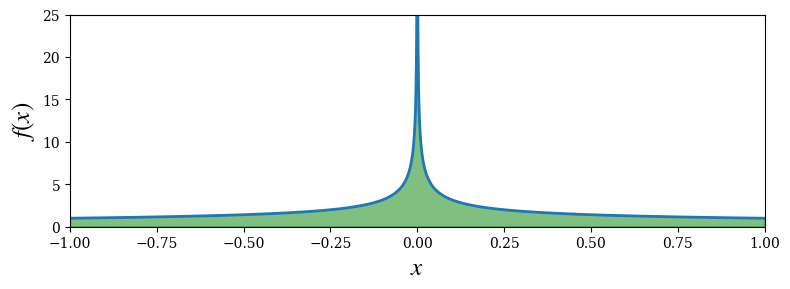

In [41]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1)

fig.tight_layout()
fig.savefig("ch8-diverging-integrand.pdf")

## Tabulated integrand

In [42]:
f = lambda x: np.sqrt(x)

In [43]:
a, b = 0, 2

In [44]:
x = np.linspace(a, b, 25)

In [45]:
y = f(x)

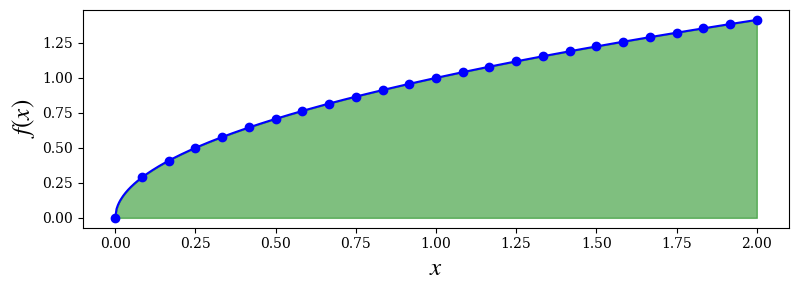

In [46]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()
fig.savefig("ch8-tabulated-integrand.pdf")

In [47]:
val_trapz = integrate.trapz(y, x)

In [48]:
val_trapz

In [49]:
val_simps = integrate.simps(y, x)

In [50]:
val_simps

In [51]:
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)

In [52]:
val_exact

In [53]:
val_exact - val_trapz

In [54]:
val_exact - val_simps

In [55]:
x = np.linspace(a, b, 1 + 2**6)

In [56]:
len(x)

In [57]:
y = f(x)

In [58]:
val_exact - integrate.romb(y, dx=(x[1]-x[0]))

In [59]:
val_exact - integrate.simps(y, dx=x[1]-x[0])

## Higher dimension

In [60]:
def f(x):
    return np.exp(-x**2)

In [61]:
%time integrate.quad(f, a, b)

CPU times: user 144 µs, sys: 35 µs, total: 179 µs
Wall time: 183 µs


In [62]:
def f(x, y):
    return np.exp(-x**2-y**2)

In [63]:
a, b = 0, 1

In [64]:
g = lambda x: 0

In [65]:
h = lambda x: 1

In [66]:
integrate.dblquad(f, a, b, g, h)

In [67]:
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

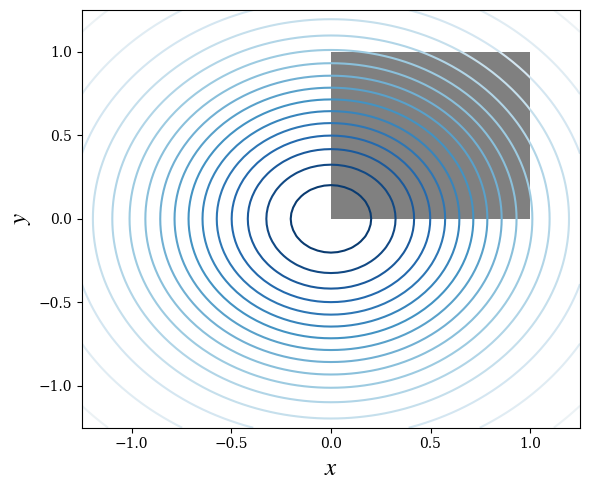

In [68]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1,
                           facecolor="grey")
ax.add_patch(bound_rect)

ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

fig.tight_layout()
fig.savefig("ch8-multi-dim-integrand.pdf")

In [69]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

In [70]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

In [71]:
integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [72]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

### nquad

In [73]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

In [74]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 589 µs, sys: 71 µs, total: 660 µs
Wall time: 664 µs


In [75]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 10.4 ms, sys: 542 µs, total: 11 ms
Wall time: 10.8 ms


In [76]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 207 ms, sys: 5.22 ms, total: 213 ms
Wall time: 211 ms


In [77]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 4.28 s, sys: 27.9 ms, total: 4.31 s
Wall time: 4.32 s


In [78]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 1min 31s, sys: 695 ms, total: 1min 32s
Wall time: 1min 33s


### Monte Carlo integration

In [80]:
from skmonaco import mcquad

In [81]:
%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)

CPU times: user 2.01 s, sys: 160 ms, total: 2.17 s
Wall time: 2.05 s


In [82]:
val, err

In [83]:
%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)

CPU times: user 1.93 s, sys: 101 ms, total: 2.03 s
Wall time: 1.96 s


In [84]:
val, err

## Symbolic and multi-precision quadrature

In [79]:
x = sympy.symbols("x")

In [80]:
f = 2 * sympy.sqrt(1-x**2)

In [81]:
a, b = -1, 1

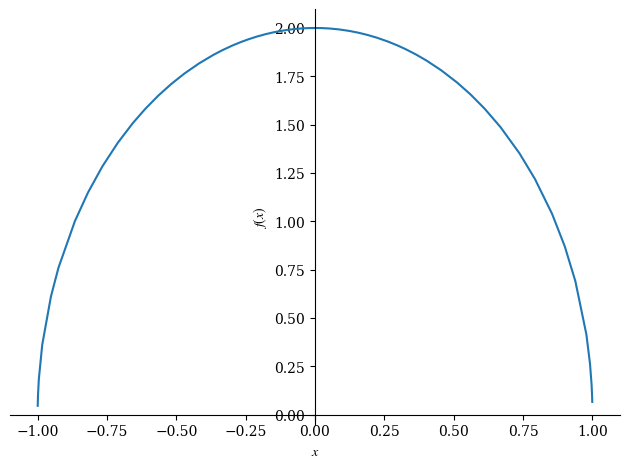

In [82]:
sympy.plot(f, (x, -2, 2));

In [83]:
val_sym = sympy.integrate(f, (x, a, b))

In [84]:
val_sym

In [85]:
mpmath.mp.dps = 75

In [86]:
f_mpmath = sympy.lambdify(x, f, 'mpmath')

In [87]:
val = mpmath.quad(f_mpmath, (a, b))

In [88]:
sympy.sympify(val)

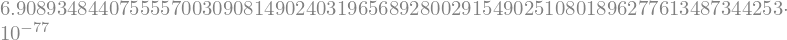

In [89]:
sympy.N(val_sym, mpmath.mp.dps+1) - val

In [90]:
%timeit mpmath.quad(f_mpmath, [a, b])

6.08 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [91]:
f_numpy = sympy.lambdify(x, f, 'numpy')

In [92]:
%timeit integrate.quad(f_numpy, a, b)

1.43 ms ± 31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### double and triple integrals

In [93]:
def f2(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f3(x, y, z):
    return np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-x**2-y**2-z**2)

In [94]:
integrate.dblquad(f2, 0, 1, lambda x : 0, lambda x : 1)

In [95]:
integrate.tplquad(f3, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [96]:
x, y, z = sympy.symbols("x, y, z")

In [97]:
f2 = sympy.cos(x)*sympy.cos(y)*sympy.exp(-x**2-y**2)

In [98]:
f3 = sympy.cos(x)*sympy.cos(y)*sympy.cos(z) * sympy.exp(-x**2 - y**2 - z**2)

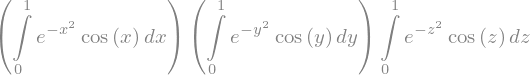

In [99]:
sympy.integrate(f3, (x, 0, 1), (y, 0, 1), (z, 0, 1))  # this does not succeed

In [100]:
f2_numpy = sympy.lambdify((x, y), f2, 'numpy')

In [101]:
integrate.dblquad(f2_numpy, 0, 1, lambda x: 0, lambda x: 1)

In [102]:
f3_numpy = sympy.lambdify((x, y, z), f3, 'numpy')

In [103]:
integrate.tplquad(f3_numpy, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [104]:
mpmath.mp.dps = 30

In [105]:
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')

In [106]:
res = mpmath.quad(f2_mpmath, (0, 1), (0, 1))
res

mpf('0.430564794306099099242308990195783')

In [107]:
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')

In [108]:
res = mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))

In [109]:
sympy.sympify(res)

In [110]:
%time res = sympy.sympify(mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1)))

CPU times: user 2min 9s, sys: 192 ms, total: 2min 10s
Wall time: 2min 10s


## Line integrals

In [111]:
t, x, y = sympy.symbols("t, x, y")

In [112]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [113]:
sympy.line_integrate(1, C, [x, y])

In [114]:
sympy.line_integrate(x**2 * y**2, C, [x, y])

## Integral transformations

### Laplace transforms

In [115]:
s = sympy.symbols("s")

In [116]:
a, t = sympy.symbols("a, t", positive=True)

In [117]:
f = sympy.sin(a*t)

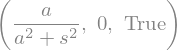

In [118]:
sympy.laplace_transform(f, t, s)

In [119]:
F = sympy.laplace_transform(f, t, s, noconds=True)

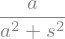

In [120]:
F

In [121]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

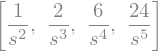

In [122]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [123]:
n = sympy.symbols("n", integer=True, positive=True)

In [124]:
sympy.laplace_transform(t**n, t, s, noconds=True)

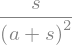

In [125]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

### Fourier Transforms

In [126]:
w = sympy.symbols("omega")

In [127]:
f = sympy.exp(-a*t**2)

In [128]:
F = sympy.fourier_transform(f, t, w)

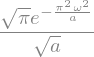

In [129]:
F

In [130]:
sympy.inverse_fourier_transform(F, w, t)

In [131]:
sympy.fourier_transform(sympy.cos(t), t, w)  # not good

## Versions

In [132]:
%reload_ext version_information

In [139]:
%version_information numpy, matplotlib, scipy, sympy, mpmath, skmonaco

Software versions
Python 3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.5.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.3
matplotlib 3.0.3
scipy 1.2.1
sympy 1.4
mpmath 1.1.0
skmonaco 0.2.1
Mon May 06 14:55:36 2019 JST